In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Perceptron classification accuracy: 1.00


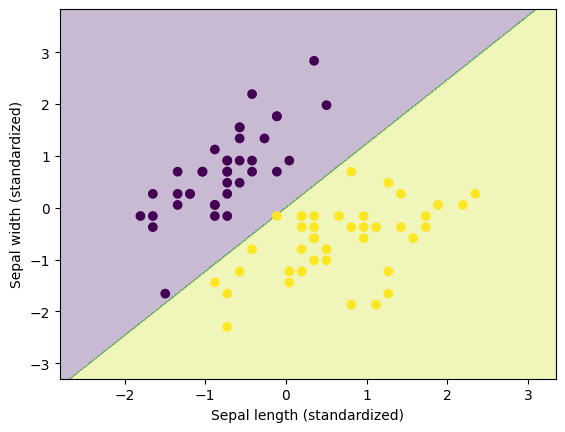

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select only two classes: Iris-setosa (0) and Iris-versicolor (1)
X = X[y != 2]  # Remove the third class (Iris-virginica)
y = y[y != 2]

# We only take the first two features (sepal length and sepal width) for visualization purposes
X = X[:, :2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perceptron model (single layer)
class Perceptron:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr  # Learning rate
        self.n_iters = n_iters  # Number of iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to +1 or -1 for the perceptron learning rule
        y_ = np.where(y == 1, 1, -1)

        # Training loop
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                # Update rule
                if y_predicted != y_[idx]:
                    self.weights += self.lr * y_[idx] * x_i
                    self.bias += self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

# Initialize and train the perceptron
perceptron = Perceptron(lr=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

# Predictions
y_pred = perceptron.predict(X_test)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Perceptron classification accuracy: {accuracy:.2f}")

# Visualization of decision boundary
def plot_decision_boundary(X, y, model):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    predictions = model.predict(grid)
    z = predictions.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')
    plt.xlabel("Sepal length (standardized)")
    plt.ylabel("Sepal width (standardized)")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_train, y_train, perceptron)


In [ ]:
# Explanation:
# Perceptron Model:

# The perceptron updates its weights based on the Perceptron Learning Rule, where weights are adjusted when the prediction differs from the true label.
# Binary Classification:

# We selected two classes from the Iris dataset: Iris-setosa (0) and Iris-versicolor (1).
# We used only the first two features (sepal length and sepal width) to make visualization easier.
# Training:

# The perceptron is trained using a basic gradient descent-like approach, where weights are updated iteratively based on errors in the prediction.
# Decision Boundary:

# The decision boundary is plotted to show the region where the perceptron classifies one class as 0 and the other as 1.
# Discussion: Limitations of the Perceptron
# The single-layer perceptron works well when the data is linearly separable—meaning a straight line (or hyperplane in higher dimensions) can separate the two classes. However, it struggles with:

# Non-Linearly Separable Data: If the data is not linearly separable (like the XOR problem), the perceptron cannot find a correct decision boundary.
# Convergence: If the data is not linearly separable, the perceptron may never converge to a solution, continuously updating weights without improving accuracy.
# Complexity: The perceptron cannot handle more complex decision boundaries that require non-linear solutions. For these problems, more advanced models like multi-layer perceptrons (MLP) or neural networks with non-linear activation functions (like ReLU or Sigmoid) are necessary.
# In summary, the perceptron is simple but limited in its capacity to solve non-linearly separable problems. More sophisticated models are needed for such cases.